<a href="https://colab.research.google.com/github/dwright-18/Clicked-MLPA-Mini-Sprint-Portfolio-/blob/main/MLPA_MiniSprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import library functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

import patsy
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [3]:
# Mounting GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Path to dataset file in Google Drive
data = "/content/drive/MyDrive/Clicked_DataSprint.zip (Unzipped Files)/general_data.csv"
#manager = "/content/drive/MyDrive/Clicked_DataSprint.zip (Unzipped Files)/manager_survey_data"
#employee = "/content/drive/MyDrive/Clicked_DataSprint.zip (Unzipped Files)/employee_survey_data"

raw_dataset = pd.read_csv(data)
#manager_survey_data = pd.read_csv(manager)
#employee_survey_data = pd.read_csv(employee)

# Copy dataset
dataset = raw_dataset.copy()
dataset.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [6]:
for column in dataset.columns:
  # Check if the data type is not an integer or a float
  if not pd.api.types.is_numeric_dtype(dataset[column]):
    # One hot encode the column with numerical categories
    dataset[column] = pd.Categorical(dataset[column])
    dataset[column] = dataset[column].cat.codes
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.0,2,6,0,4


In [ ]:
# Columns

print(dataset.columns)

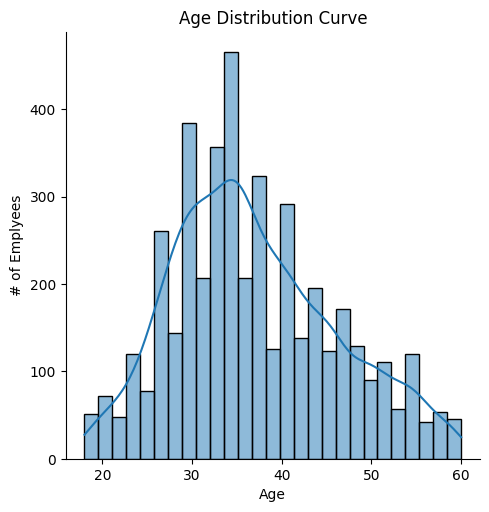

In [7]:
# Age Distribution Chart

data_column = dataset['Age']

sns.displot(data_column, kde=True)
plt.xlabel('Age')
plt.ylabel('# of Emplyees')
plt.title('Age Distribution Curve')
plt.show()

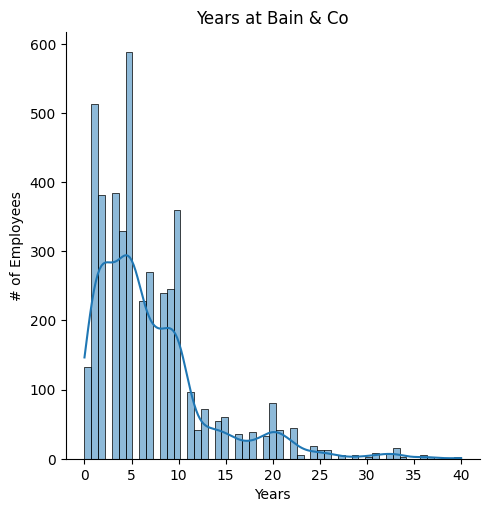

In [32]:
# Years at Company Distribution Chart

data_column = dataset['YearsAtCompany']

sns.displot(data_column, kde=True)
plt.xlabel('Years')
plt.ylabel('# of Employees')
plt.title('Years at Bain & Co')
plt.show()

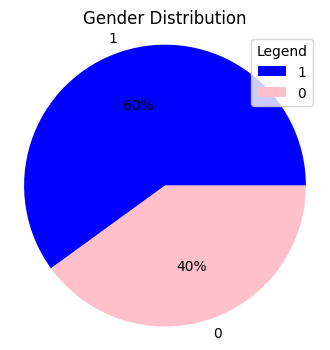

In [27]:
# Gender Pie Chart

value_counts = dataset['Gender'].value_counts()

plt.figure(figsize=(4, 4))  # Adjust size of the pie chart as needed
plt.pie(value_counts, labels=value_counts.index, autopct='%1.0f%%', colors=['blue', 'pink'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Gender Distribution')
plt.legend(title='Legend', loc='upper right')
plt.show()

In [ ]:
# Monthly Income Distribution Chart

data_column = dataset['MonthlyIncome']

sns.displot(data_column, kde=True)
plt.xlabel('MonthlyIncome')
plt.ylabel('$')
plt.title('Monthly Income')
plt.show()

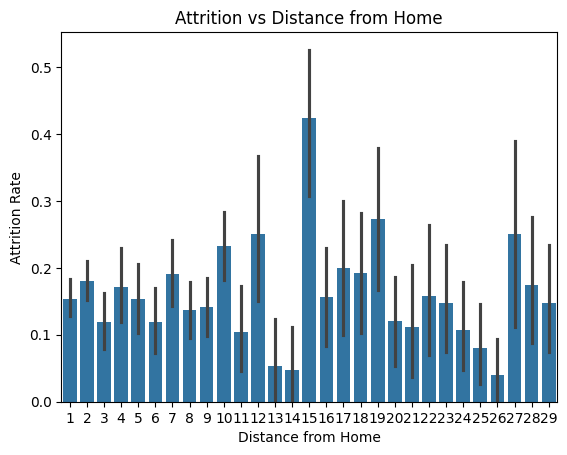

In [80]:
# prompt: create a chart for attrition vs distance traveled

sns.barplot(x='DistanceFromHome', y='Attrition', data=dataset)
plt.xlabel('Distance from Home')
plt.ylabel('Attrition Rate')
plt.title('Attrition vs Distance from Home')
plt.show()


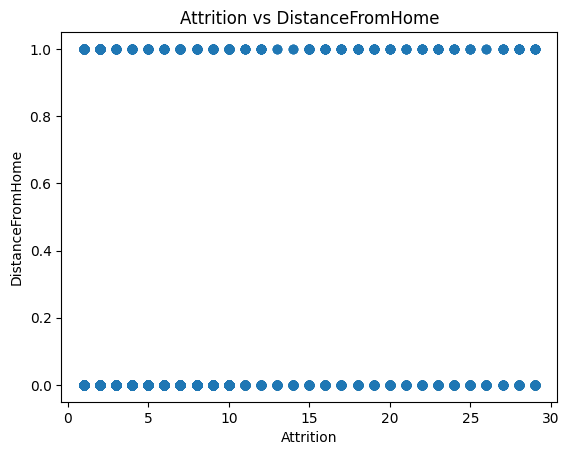

In [37]:
# Attrition vs Distance Traveled

x_data = dataset['DistanceFromHome']
y_data = dataset['Attrition']

plt.scatter(x_data, y_data)
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHome')
plt.title('Attrition vs DistanceFromHome')
plt.show()


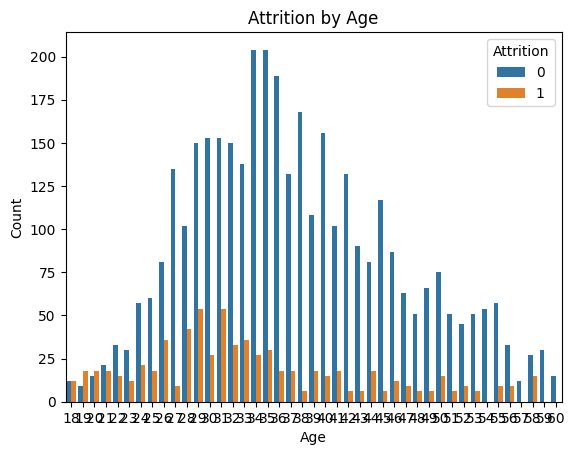

In [85]:
# prompt: create a bar chart of the age and attrition

sns.countplot(x='Age', hue='Attrition', data=dataset)
plt.title('Attrition by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [ ]:
# DistanceFromHome Bar Chart

data_column = dataset['DistanceFromHome']

sns.displot(data_column, kde=True)
plt.xlabel('X-axis Label')
plt.ylabel('DistanceFromHome')
plt.title('Distribution Curve')
plt.show()

In [ ]:
# Training & Testing Data

train_dataset=dataset.copy
train_dataset = train_dataset()
test_dataset=dataset.copy
test_dataset = test_dataset()


In [ ]:
# Inspect Data

check_non_numerical_columns=[train_dataset, test_dataset]

def check_non_numerical_columns(dataset):
  for dataset in dataset:
    for column in dataset.columns:
      if train_dataset[columns].dtype == 'object':
        print(f"Non-numerical data found in column: {column}")
        print(train_dataset[column].unique())
        print()

In [ ]:
#

X = train_dataset.drop('Attrition',axis=1)
y = train_dataset['Attrition']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#print(X_train.dtypes)

print(y_train.dtypes)

In [ ]:
# Create a DecisionTreeClassifier object
clf = DecisionTreeClassifier(max_depth=4)

# Convert non-numerical data in y_train to numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

#print(pd.Series(y_train).dtypes)
# Train the classifier
clf.fit(X_train, y_train)